# Scikit - Learn Project

# Project - Principal Component Analysis (PCA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()   # to set the layout

In [3]:
from sklearn.decomposition import PCA

X = np.random.rand(200,50)    

In [6]:
pcaModel = PCA()
pcaModel.fit(X)

PCA()

In [7]:
#  explained_variance_ratio_  used to see which components are important and which are not
pcaModel.explained_variance_ratio_     

array([0.04503152, 0.04117927, 0.040853  , 0.03863598, 0.03549371,
       0.03333476, 0.03270794, 0.03190812, 0.03149501, 0.03023868,
       0.02867854, 0.02763223, 0.027476  , 0.02694307, 0.02494155,
       0.02450136, 0.02377432, 0.0226452 , 0.02213705, 0.02186412,
       0.02053782, 0.02021956, 0.0197746 , 0.01863932, 0.01814844,
       0.01758346, 0.01731604, 0.01674795, 0.01580036, 0.01543692,
       0.01507732, 0.01433742, 0.014057  , 0.01344161, 0.01290758,
       0.01265313, 0.01235171, 0.01145397, 0.01125722, 0.01067353,
       0.01020517, 0.00987242, 0.00906296, 0.00893707, 0.00883562,
       0.00829981, 0.00714567, 0.0068456 , 0.00614444, 0.00476484])

In [8]:
# cumulative sum eventually goto 1
pcaModel.explained_variance_ratio_.cumsum()

array([0.04503152, 0.08621079, 0.12706379, 0.16569977, 0.20119348,
       0.23452824, 0.26723618, 0.2991443 , 0.33063931, 0.360878  ,
       0.38955654, 0.41718877, 0.44466476, 0.47160783, 0.49654938,
       0.52105074, 0.54482506, 0.56747026, 0.58960731, 0.61147143,
       0.63200925, 0.65222881, 0.67200341, 0.69064272, 0.70879116,
       0.72637462, 0.74369067, 0.76043862, 0.77623898, 0.7916759 ,
       0.80675322, 0.82109064, 0.83514764, 0.84858925, 0.86149683,
       0.87414996, 0.88650167, 0.89795564, 0.90921285, 0.91988639,
       0.93009156, 0.93996399, 0.94902695, 0.95796402, 0.96679964,
       0.97509945, 0.98224512, 0.98909072, 0.99523516, 1.        ])

In [9]:
# Here the components are 50 (50 columns)
# Here energy is larger than 0.95

pcaModel.explained_variance_ratio_.cumsum() > 0.95

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True])

In [10]:
# How many components should I use if I want the energy is to be larger than 0.95
# [0][0] ---- array inside ----- 0 index

nc = np.where(pcaModel.explained_variance_ratio_.cumsum() > 0.95) [0][0]

In [12]:
# nc - Number of components
# To Gain 95% (0.95) of energy, the total number of components you need is 43

nc

43

In [15]:
# To see thetotal number of components  (total columns)
pcaModel.n_components_       

50

NOTE:  To keep 95% of energy may be you loose 5% of information/data, may be loosing that information is good for noise supression

In [25]:
def myPCA(energyValue, X):      # X is a dataset
    m = PCA()     # m is any model
    m.fit(X)
    nc = np.where(m.explained_variance_ratio_.cumsum() > energyValue)[0][0]
    m = PCA(n_components=nc)
    m.fit(X)  # fit the model
    X2 = m.transform(X)   # transform the model
    return X2

In [26]:
# Generate some data now
X = np.random.rand(200, 50)
X2 = myPCA(0.90, X)

In [27]:
X.shape

(200, 50)

In [28]:
X2.shape

(200, 37)

In [29]:
type(X2)

numpy.ndarray

In [30]:
type(X)

numpy.ndarray

# Pipeline in Scikit-Learn

Pipeline function is available in scikit learn 

Pipeline is a powerful function that allows you to define a sepquence of operations or a full pipeline of Machine Learning modules that you want your data go through achieve the subsequent task

Example : Polynomial Regression, Linear Regression


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [46]:
def PR(degree=2, **kwargs):      # PR - Polynomial Regression, **kwargs- we receive dictionary kind of values
    # p - pipeline
    p = make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
    return p   

In [47]:
X = np.arange(30)    # data points
y = 3*(X**2)-10*X+34  # Polynomial expression
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])

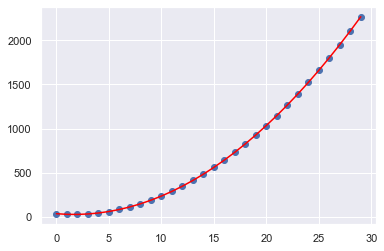

In [48]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

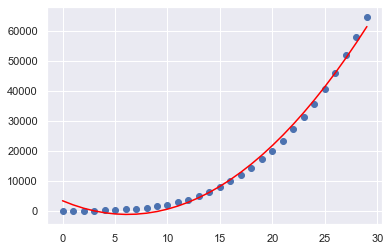

In [52]:
# Add some noise - Test case 2

X = np.arange(30)   # data points 
y = 3*(X**3)-10*(X**2)+34 +50*np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

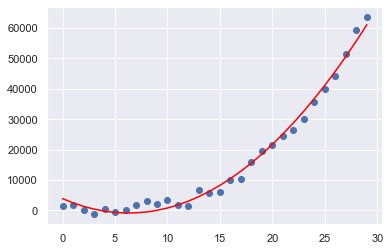

In [54]:
# Add some noise - Test case 3

X = np.arange(30)   # data points 
y = 3*(X**3)-10*(X**2)+34 +1000*np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

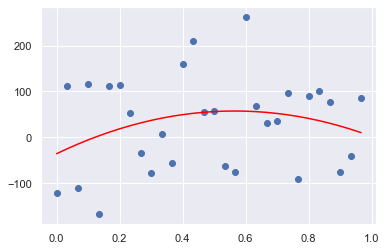

In [56]:
# Add some noise - Test case 4

X = np.arange(30)/30   # data points are small now
y = 3*(X**3)-10*(X**2)+34 +100*np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

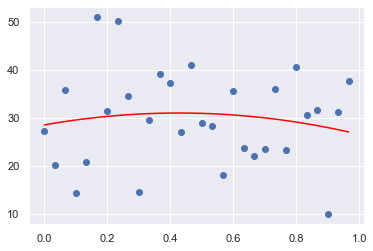

In [58]:
# Add some noise - Test case 5 

X = np.arange(30)/30   # data points are small now
y = 3*(X**3)-10*(X**2)+34 +10*np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

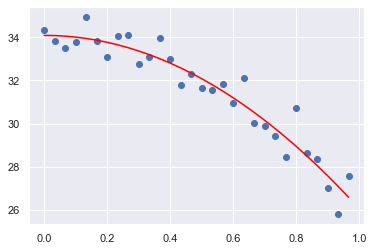

In [59]:
# Add some noise - Test case 6  
# 2 degree polynomial is trying to model 3 degree polynomial

X = np.arange(30)/30   # data points are small now
y = 3*(X**3)-10*(X**2)+34 +np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(2).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

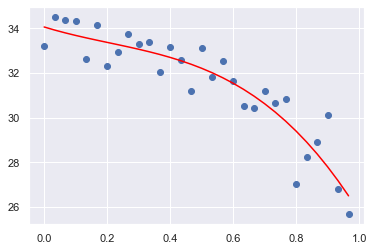

In [60]:
# Add some noise - Test case 7 
# change the degree - 3 degree polynomial

X = np.arange(30)/30   # data points are small now
y = 3*(X**3)-10*(X**2)+34 +np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(3).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

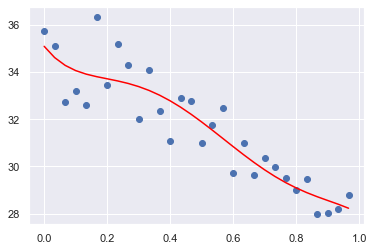

In [61]:
# Add some noise - Test case 7 
# change the degree - 5 degree polynomial

X = np.arange(30)/30   # data points are small now
y = 3*(X**3)-10*(X**2)+34 +np.random.randn(X.size)  # Polynomial expression -  add some noise
y_pred = PR(5).fit(X[:, np.newaxis], y).predict(X[:, np.newaxis])
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

# Model Selection

# Cross Validation

Degree of parameter is the hyper parameter and can we find out what model actually we are going to in our data. So that can be answered through Cross Validation.

If you just splits of your data and you run it again and again for different parameters, you can get the best score for best hyper parameter can be reported.

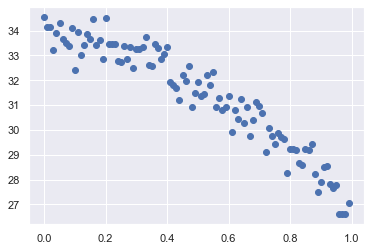

In [64]:
X = np.arange(100)/100   # data points 
y = 3*(X**3)-10*(X**2)+34 +(0.5)*np.random.randn(X.size)  # Polynomial expression 
plt.scatter(X,y)

In [68]:
from sklearn.model_selection import validation_curve

In [87]:
degree = np.arange(0,15)
# train_score, val_score = validation_curve(PR(), X, y, 'polynomialfeatures__degree', degree, cv=5)
train_score, val_score = validation_curve(PR(), X[:,np.newaxis], y, 'polynomialfeatures__degree', degree, cv=5)

# cv=5, splits of the data

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

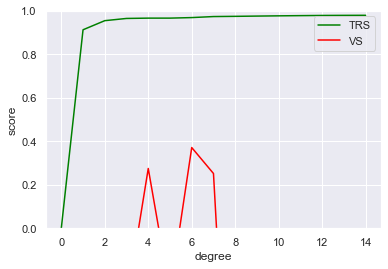

In [88]:
plt.plot(degree, np.median(train_score, 1), color='green', label = 'TRS')    # TRS- Training Score
plt.plot(degree, np.median(val_score, 1), color='red', label = 'VS')         # VS- Value Score
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")

In [89]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.9633232 , 0.92024453, 0.91301472, 0.90923075, 0.83862904],
       [0.96332694, 0.95893226, 0.95488656, 0.95118172, 0.89522928],
       [0.96674693, 0.96133017, 0.96511362, 0.96784663, 0.92669572],
       [0.96735459, 0.96307785, 0.96655148, 0.97046654, 0.93034907],
       [0.96893279, 0.9636894 , 0.96658921, 0.97096809, 0.94715364],
       [0.96907487, 0.965861  , 0.97143829, 0.97282896, 0.94820974],
       [0.97379642, 0.96715045, 0.97419055, 0.97647803, 0.94821431],
       [0.97478955, 0.97177739, 0.97987124, 0.97810633, 0.94821883],
       [0.97598158, 0.97333107, 0.98040668, 0.97832123, 0.95249837],
       [0.97710465, 0.97333163, 0.98063091, 0.97868921, 0.95924663],
       [0.97805443, 0.97335762, 0.98063097, 0.97888088, 0.96029323],
       [0.97893907, 0.97336568, 0.9810061 , 0.97888243, 0.96139829],
       [0.97930553, 0.97366723, 0.98230472, 0.97951792, 0.96139831],
       [0.97956279, 0.97548254, 0.

# Example 2 - test case 2

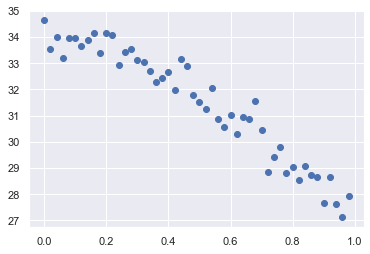

In [91]:
# Example 2 - test case 2

X = np.arange(50)/50   # data points 
y = 3*(X**3)-10*(X**2)+34 +(0.5)*np.random.randn(X.size)  # Polynomial expression 
plt.scatter(X,y)

In [92]:
from sklearn.model_selection import validation_curve

In [93]:
degree = np.arange(0,15)
# train_score, val_score = validation_curve(PR(), X, y, 'polynomialfeatures__degree', degree, cv=5)
train_score, val_score = validation_curve(PR(), X[:,np.newaxis], y, 'polynomialfeatures__degree', degree, cv=5)

# cv=5, splits of the data

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

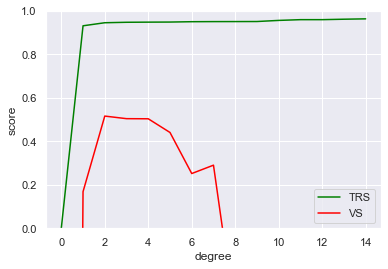

In [94]:
plt.plot(degree, np.median(train_score, 1), color='green', label = 'TRS')    # TRS- Training Score
plt.plot(degree, np.median(val_score, 1), color='red', label = 'VS')         # VS- Value Score
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")